In [17]:
from neurodsp.sim import sim_combined
from phasic_tonic.detect_phasic_v2 import detect_phasic
import numpy as np

In [9]:
fs=500
sig = sim_combined(n_seconds=600, fs=500, components={'sim_synaptic_current': {}, 'sim_bursty_oscillation' : {'freq':10}})

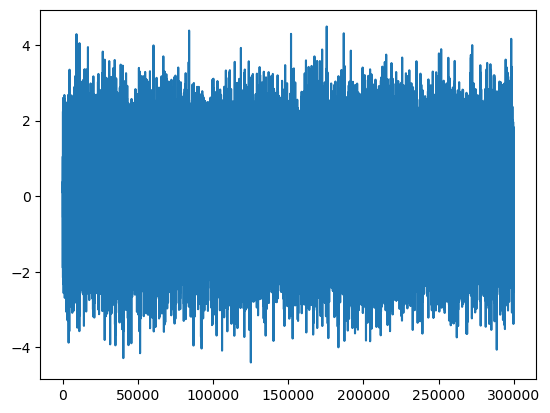

In [10]:
import matplotlib.pyplot as plt
plt.plot(sig)

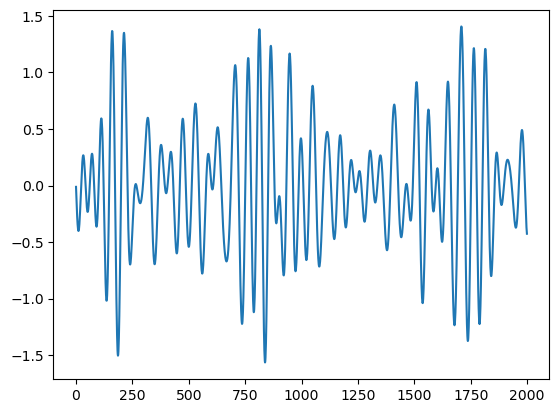

In [13]:
from neurodsp.filt import filter_signal
sig_filt = filter_signal(sig, fs, 'bandpass', (5, 12), remove_edges=False)
plt.plot(sig_filt[500:2500])

In [68]:
hypno=np.array([3]*600)
hypno[:200]=5
hypno[300:350]=5
hypno[450:]=5

phrem=detect_phasic(sig, hypno, fs)
phrem

{(0, 199): [], (300, 349): [(167119, 167608)], (450, 599): []}

In [65]:
from phasic_tonic.detect_phasic_v2 import get_segments
phasic = []
for rem_idx in phrem:
    phasic_idx = phrem[rem_idx]
    phasic.extend(get_segments(phasic_idx, sig))

In [66]:
phrem

{(0, 199): [], (300, 349): [(167119, 167608)], (480, 599): []}

In [41]:
104188/500

208.376